In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

from sklearn.preprocessing import LabelEncoder

In [2]:
hr = pd.read_csv("/Users/dominicventura/Machine Learning/Neural Network Project/hremployee.csv")

In [3]:
companyYears = hr[(hr['YearsAtCompany'] == 1) | (hr['YearsAtCompany'] == 2)]

companyYears.drop(['EmployeeCount', 
         'EmployeeNumber', 
         'Over18', 
         'StandardHours'], axis=1, inplace=True)

/Users/dominicventura/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [4]:
cat_cols2 = []
for column in companyYears.columns:
    if companyYears[column].dtype == object and len(companyYears[column].unique()) <= 30:
        cat_cols2.append(column)
        print(f"{column} : {companyYears[column].unique()}")
        print(companyYears[column].value_counts())
        print("====================================")
cat_cols2.remove('Attrition')

Attrition : ['No' 'Yes']
No     212
Yes     86
Name: Attrition, dtype: int64
BusinessTravel : ['Travel_Rarely' 'Non-Travel' 'Travel_Frequently']
Travel_Rarely        219
Travel_Frequently     55
Non-Travel            24
Name: BusinessTravel, dtype: int64
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    199
Sales                      86
Human Resources            13
Name: Department, dtype: int64
EducationField : ['Medical' 'Life Sciences' 'Marketing' 'Technical Degree' 'Other'
 'Human Resources']
Life Sciences       130
Medical              88
Marketing            32
Technical Degree     25
Other                17
Human Resources       6
Name: EducationField, dtype: int64
Gender : ['Male' 'Female']
Male      190
Female    108
Name: Gender, dtype: int64
JobRole : ['Laboratory Technician' 'Manager' 'Sales Representative'
 'Research Scientist' 'Sales Executive' 'Healthcare Representative'
 'Manufacturing Director' 'Human Resources' 'Research Dire

We can see that there is an imbalance again with 212 employees not leaving and only 86 that do after 1-2 years. So that means ~71% stay.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1432566a0>,
      dtype=object)

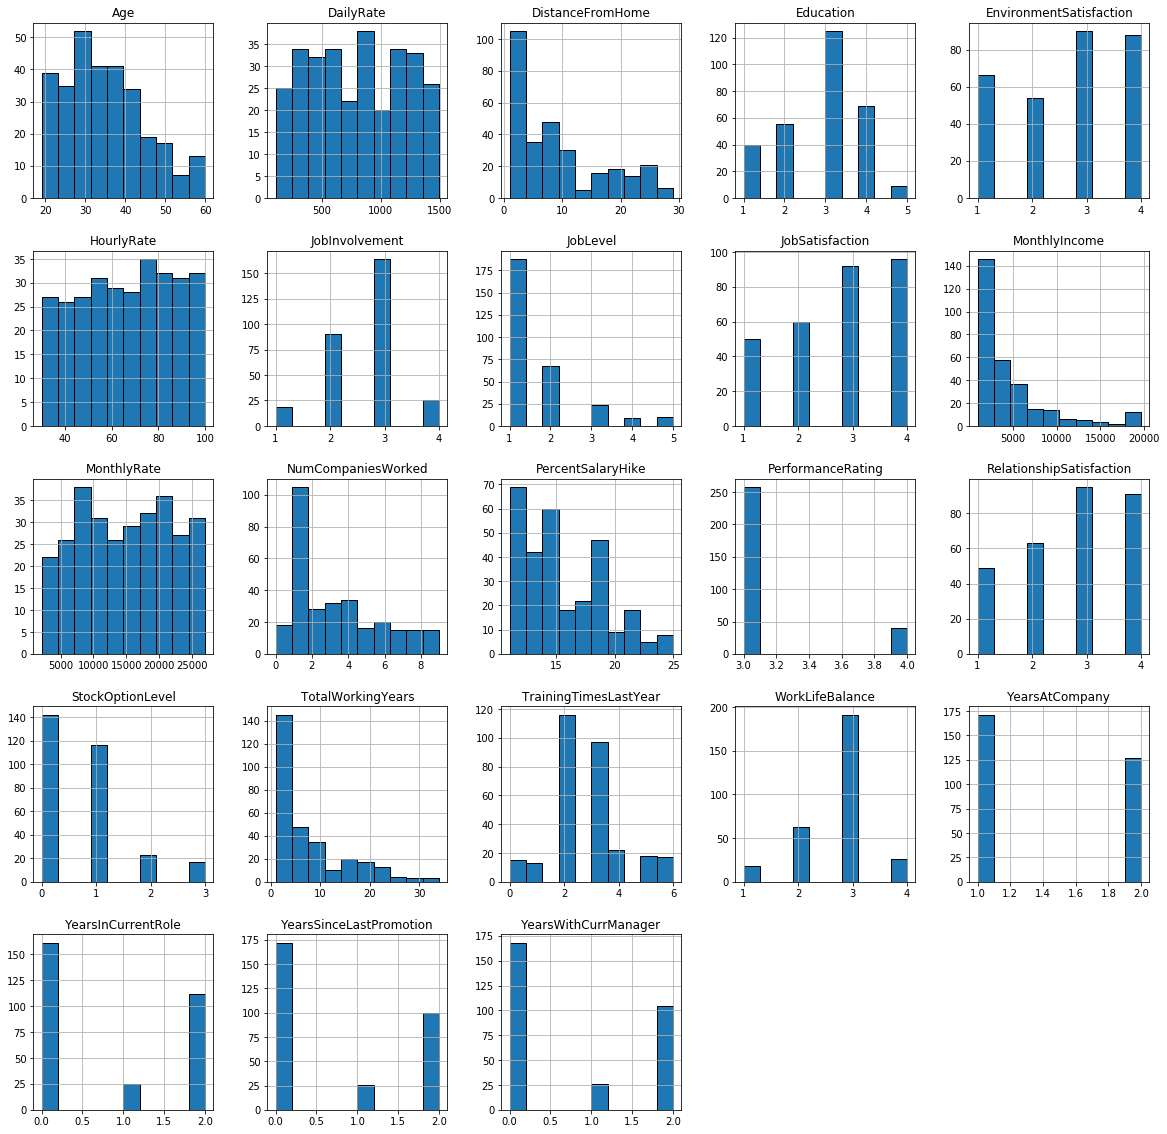

In [5]:
companyYears.hist(edgecolor = "black", linewidth = 1, figsize=(20,20))

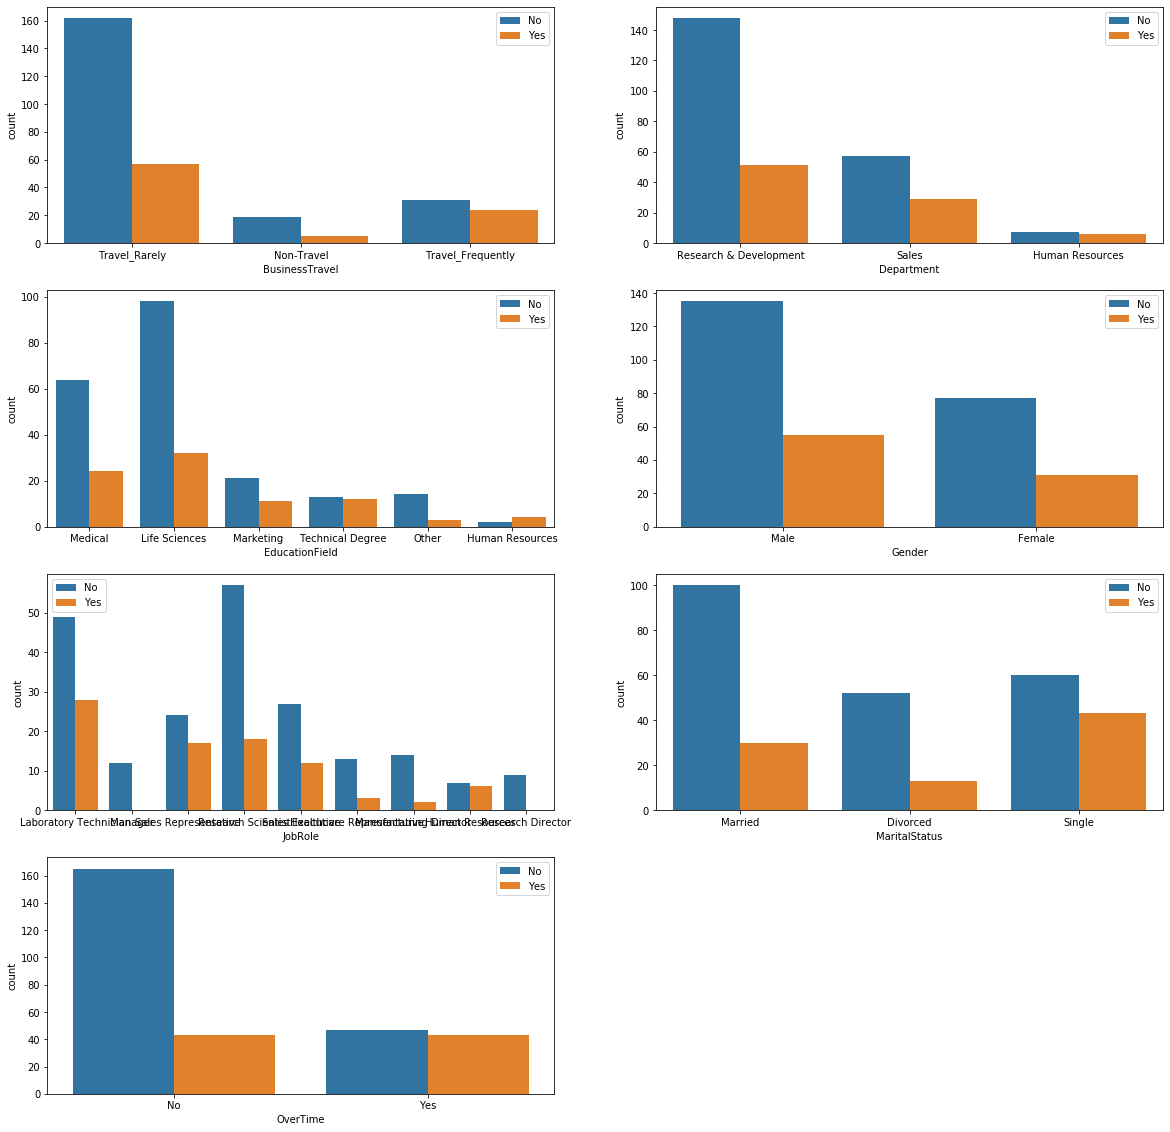

In [6]:
plt.figure(figsize=(20,20))

for i, column in enumerate(cat_cols2, 1):
    plt.subplot(4,2,i)
    sns.countplot(x=column, hue = "Attrition", data=companyYears)
    plt.legend()
    plt.xlabel(column)
    
    

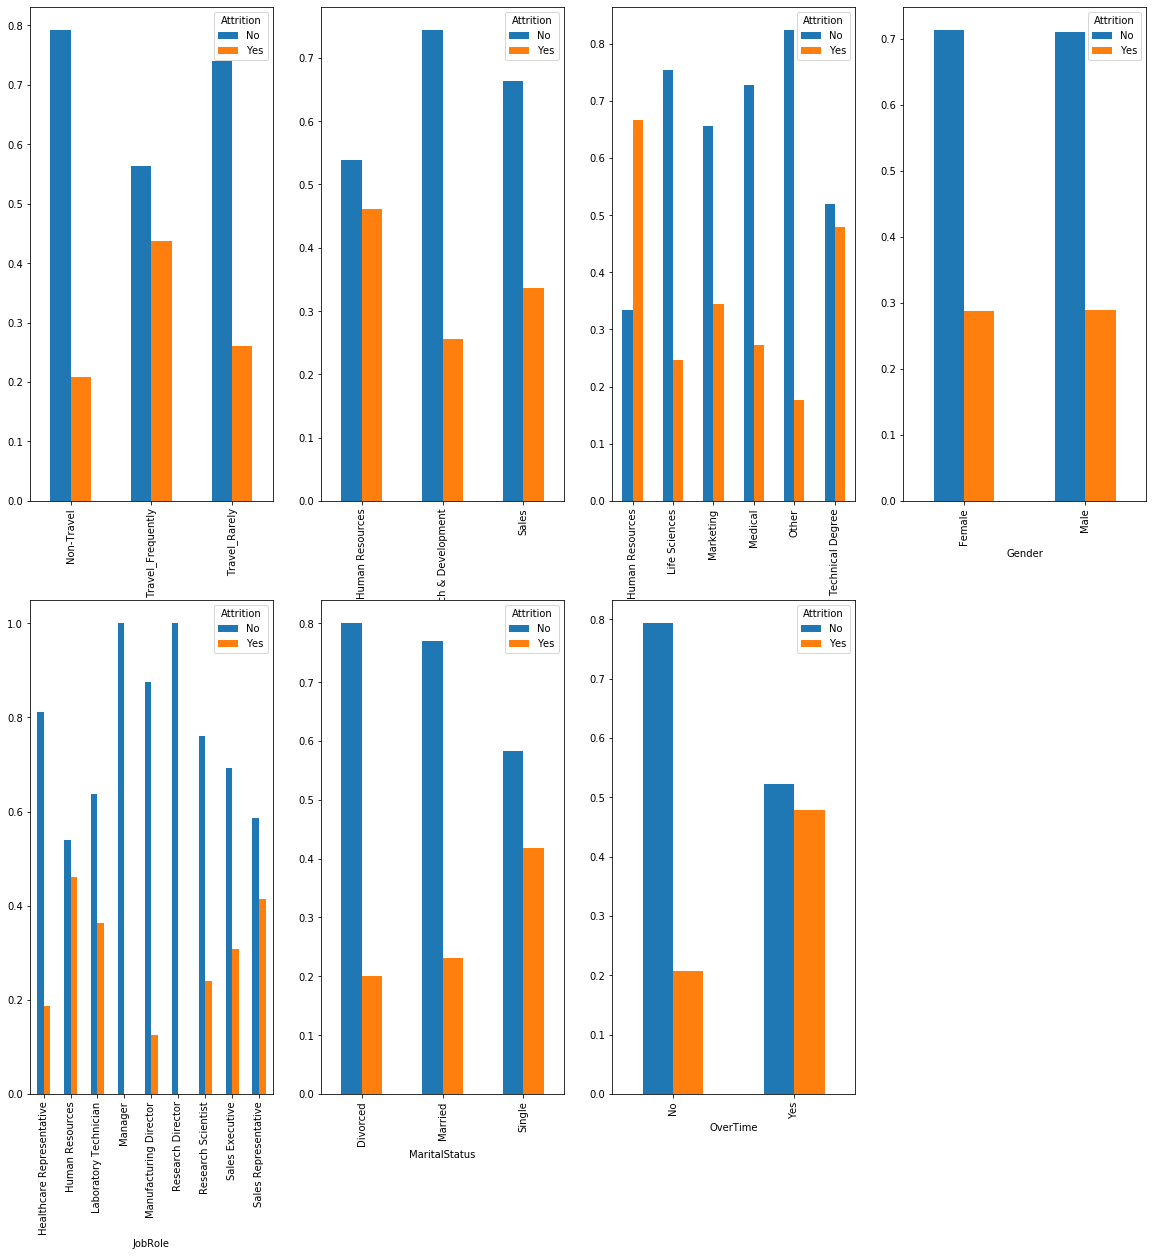

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,20))

props = companyYears.groupby("BusinessTravel")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,0])

props = companyYears.groupby("Department")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,1])

props = companyYears.groupby("EducationField")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,2])

props = companyYears.groupby("Gender")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[0,3])

props = companyYears.groupby("JobRole")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,0])

props = companyYears.groupby("MaritalStatus")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,1])

props = companyYears.groupby("OverTime")['Attrition'].value_counts(normalize=True).unstack()
props.plot(kind='bar', ax=axes[1,2])

fig.delaxes(axes[1][3])

In [8]:
print(pd.crosstab(columns = [companyYears.Attrition], index = [companyYears.BusinessTravel], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [companyYears.Attrition], index = [companyYears.Department], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [companyYears.Attrition], index = [companyYears.EducationField], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [companyYears.Attrition], index = [companyYears.Gender], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [companyYears.Attrition], index = [companyYears.JobRole], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [companyYears.Attrition], index = [companyYears.MaritalStatus], margins = True, normalize = 'index'))
print("="*45)
print(pd.crosstab(columns = [companyYears.Attrition], index = [companyYears.OverTime], margins = True, normalize = 'index'))

Attrition                No       Yes
BusinessTravel                       
Non-Travel         0.791667  0.208333
Travel_Frequently  0.563636  0.436364
Travel_Rarely      0.739726  0.260274
All                0.711409  0.288591
Attrition                     No       Yes
Department                                
Human Resources         0.538462  0.461538
Research & Development  0.743719  0.256281
Sales                   0.662791  0.337209
All                     0.711409  0.288591
Attrition               No       Yes
EducationField                      
Human Resources   0.333333  0.666667
Life Sciences     0.753846  0.246154
Marketing         0.656250  0.343750
Medical           0.727273  0.272727
Other             0.823529  0.176471
Technical Degree  0.520000  0.480000
All               0.711409  0.288591
Attrition        No       Yes
Gender                       
Female     0.712963  0.287037
Male       0.710526  0.289474
All        0.711409  0.288591
Attrition                      

In [9]:
label = LabelEncoder()
companyYears["Attrition"] = label.fit_transform(companyYears.Attrition)

/Users/dominicventura/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
discrete_cols2 = []
for column in companyYears.columns:
    if companyYears[column].dtype != object and companyYears[column].nunique() < 30 :
        print(f"{column} : {companyYears[column].nunique()}") # number of unqiue values for each numerical column
        discrete_cols2.append(column)
        print("====================================================")

discrete_cols2.remove('Attrition')

Attrition : 2
DistanceFromHome : 27
Education : 5
EnvironmentSatisfaction : 4
JobInvolvement : 4
JobLevel : 5
JobSatisfaction : 4
NumCompaniesWorked : 10
PercentSalaryHike : 15
PerformanceRating : 2
RelationshipSatisfaction : 4
StockOptionLevel : 4
TrainingTimesLastYear : 7
WorkLifeBalance : 4
YearsAtCompany : 2
YearsInCurrentRole : 3
YearsSinceLastPromotion : 3
YearsWithCurrManager : 3


In [11]:
continuous2 = []
for column in companyYears.columns:
    if column != object and companyYears[column].nunique() > 30:
        print(f"{column}: Min: {companyYears[column].min()}, Max: {companyYears[column].max()}")
        continuous2.append(column)
        print("====================================================")

Age: Min: 19, Max: 60
DailyRate: Min: 104, Max: 1495
HourlyRate: Min: 30, Max: 100
MonthlyIncome: Min: 1009, Max: 19627
MonthlyRate: Min: 2097, Max: 26999


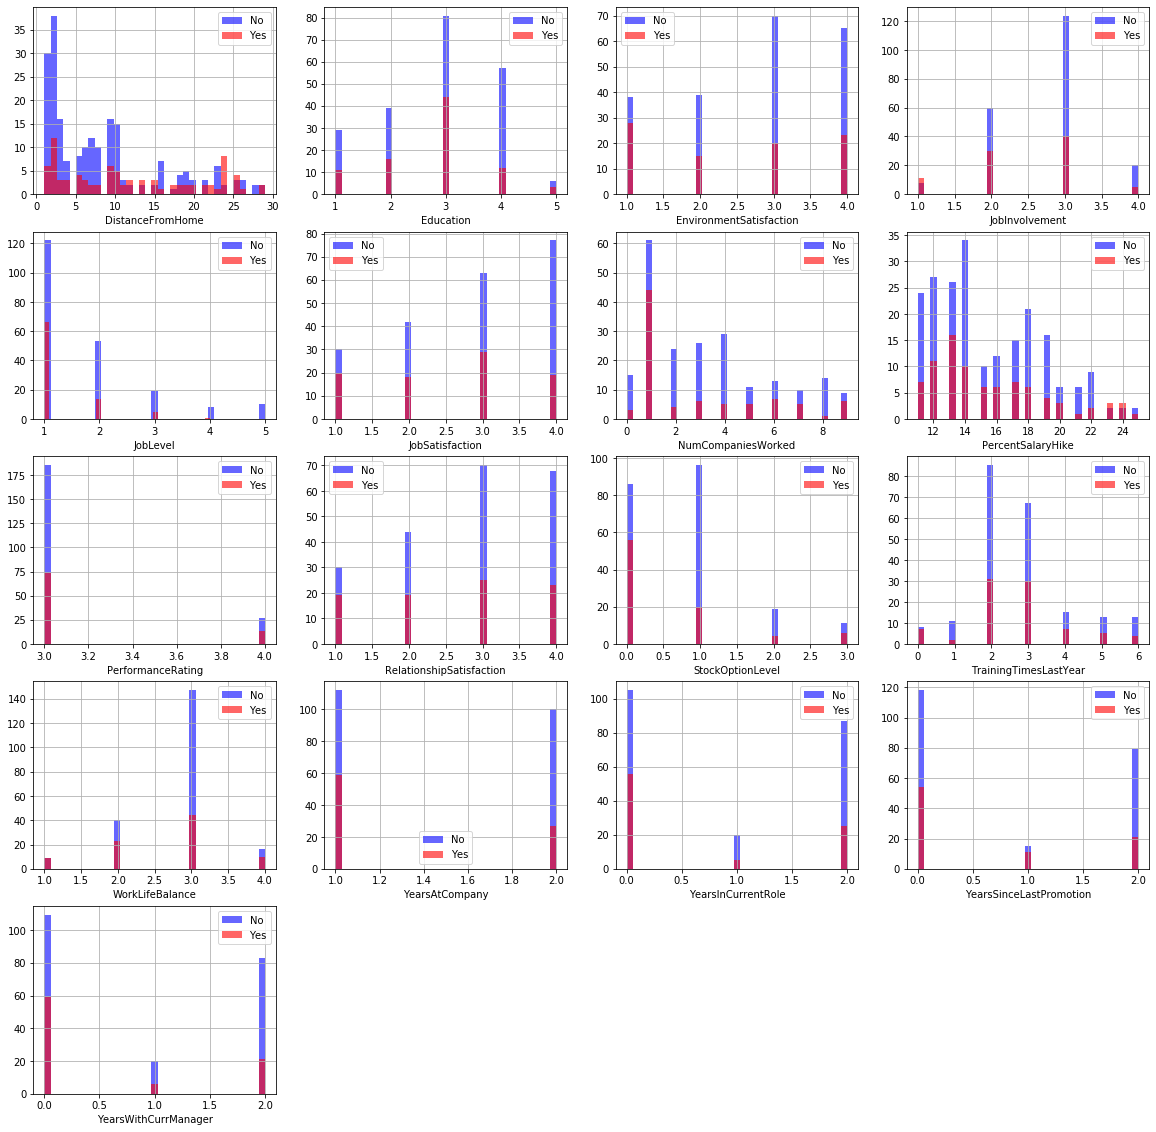

In [12]:
plt.figure(figsize=(20,20))

for i, column in enumerate(discrete_cols2, 1):
    plt.subplot(5,4,i)
    companyYears[companyYears["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "No", alpha = 0.6)
    companyYears[companyYears["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Yes", alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

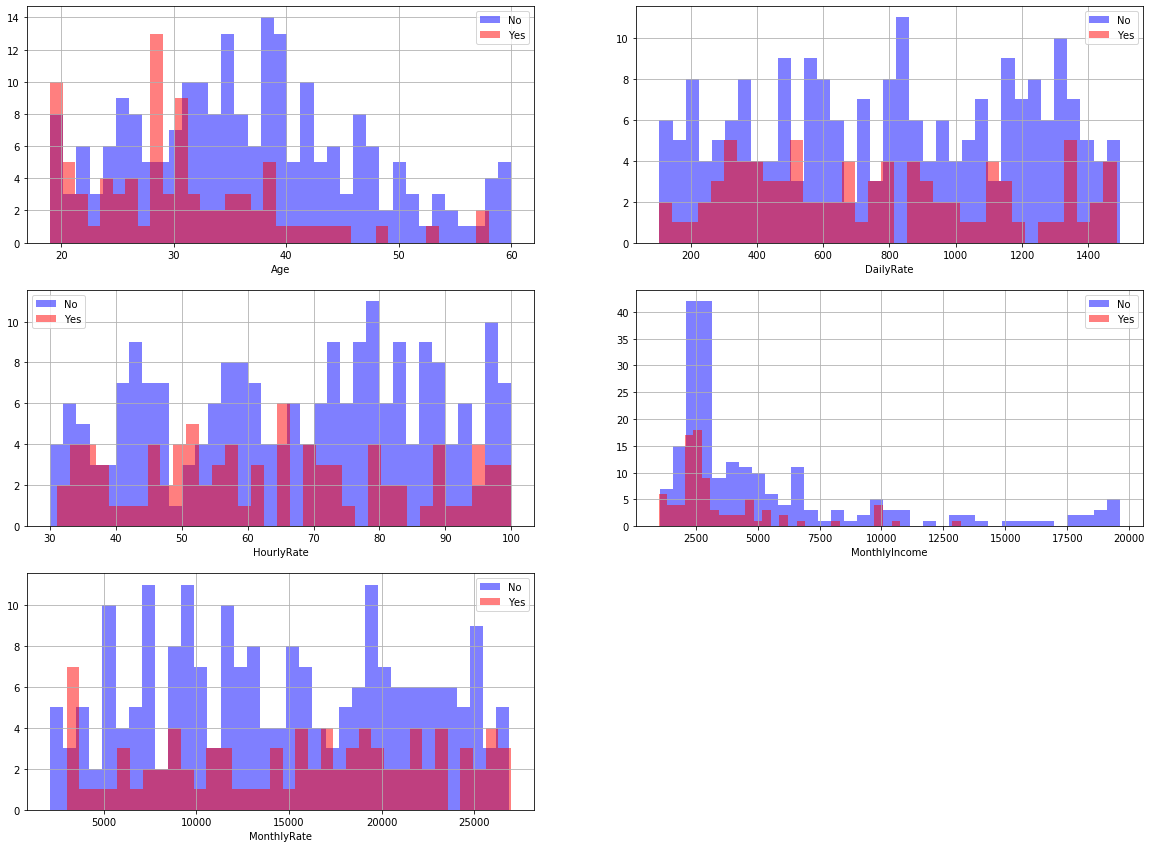

In [13]:
plt.figure(figsize=(20,20))

for i, column in enumerate(continuous2, 1):
    plt.subplot(4,2,i)
    companyYears[companyYears["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "No", alpha = 0.5)
    companyYears[companyYears["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Yes", alpha = 0.5)
    plt.legend()
    plt.xlabel(column)

In [24]:
cyhr = companyYears[(companyYears['Department'] == "Human Resources")]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
232,59,0,Travel_Rarely,818,Human Resources,6,2,Medical,2,Male,...,3,4,0,7,2,2,2,2,2,2
310,31,0,Travel_Rarely,106,Human Resources,2,3,Human Resources,1,Male,...,3,4,0,9,1,3,2,2,1,0
422,19,1,Travel_Rarely,489,Human Resources,2,2,Technical Degree,1,Male,...,3,3,0,1,3,4,1,0,0,0
493,44,0,Travel_Rarely,1112,Human Resources,1,4,Life Sciences,1,Female,...,3,2,0,10,1,4,2,2,0,2
1039,34,1,Travel_Rarely,1107,Human Resources,9,4,Technical Degree,1,Female,...,3,4,0,2,0,3,2,2,2,2
1200,44,0,Travel_Rarely,528,Human Resources,1,3,Life Sciences,3,Female,...,3,1,3,8,2,3,2,2,2,2
1222,24,1,Travel_Rarely,240,Human Resources,22,1,Human Resources,4,Male,...,3,3,1,1,2,3,1,0,0,0
1245,24,0,Travel_Frequently,897,Human Resources,10,3,Medical,1,Male,...,3,4,1,3,2,3,2,2,2,1
1312,31,1,Travel_Rarely,359,Human Resources,18,5,Human Resources,4,Male,...,3,3,0,2,4,3,1,0,0,0
1313,29,1,Travel_Rarely,350,Human Resources,13,3,Human Resources,1,Male,...,3,4,3,4,3,3,2,2,2,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10dd56978>,
      dtype=object)

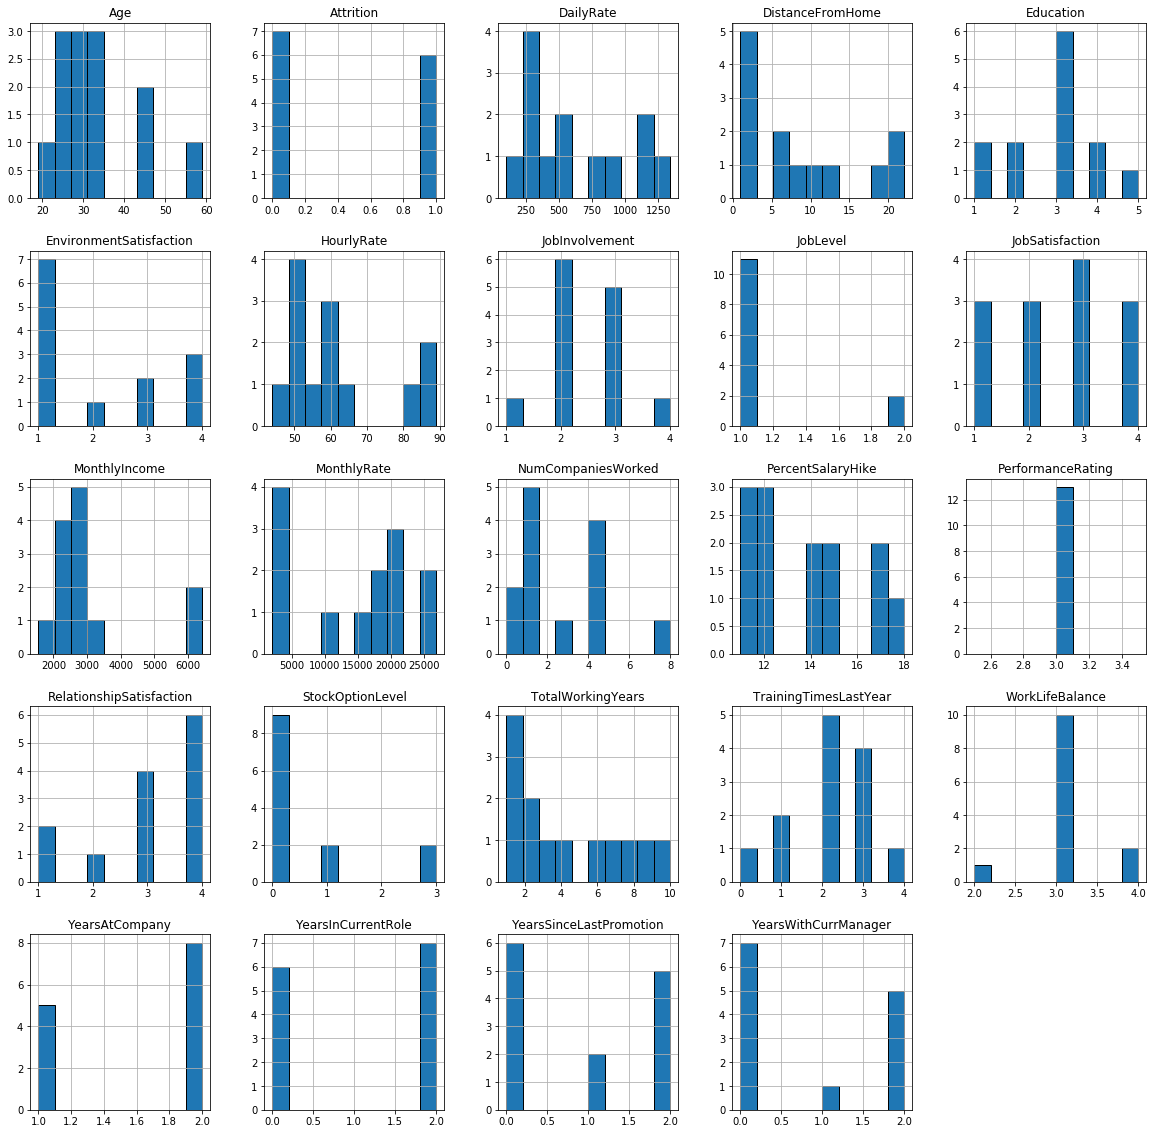

In [26]:
cyhr.hist(edgecolor = "black", linewidth = 1, figsize=(20,20))

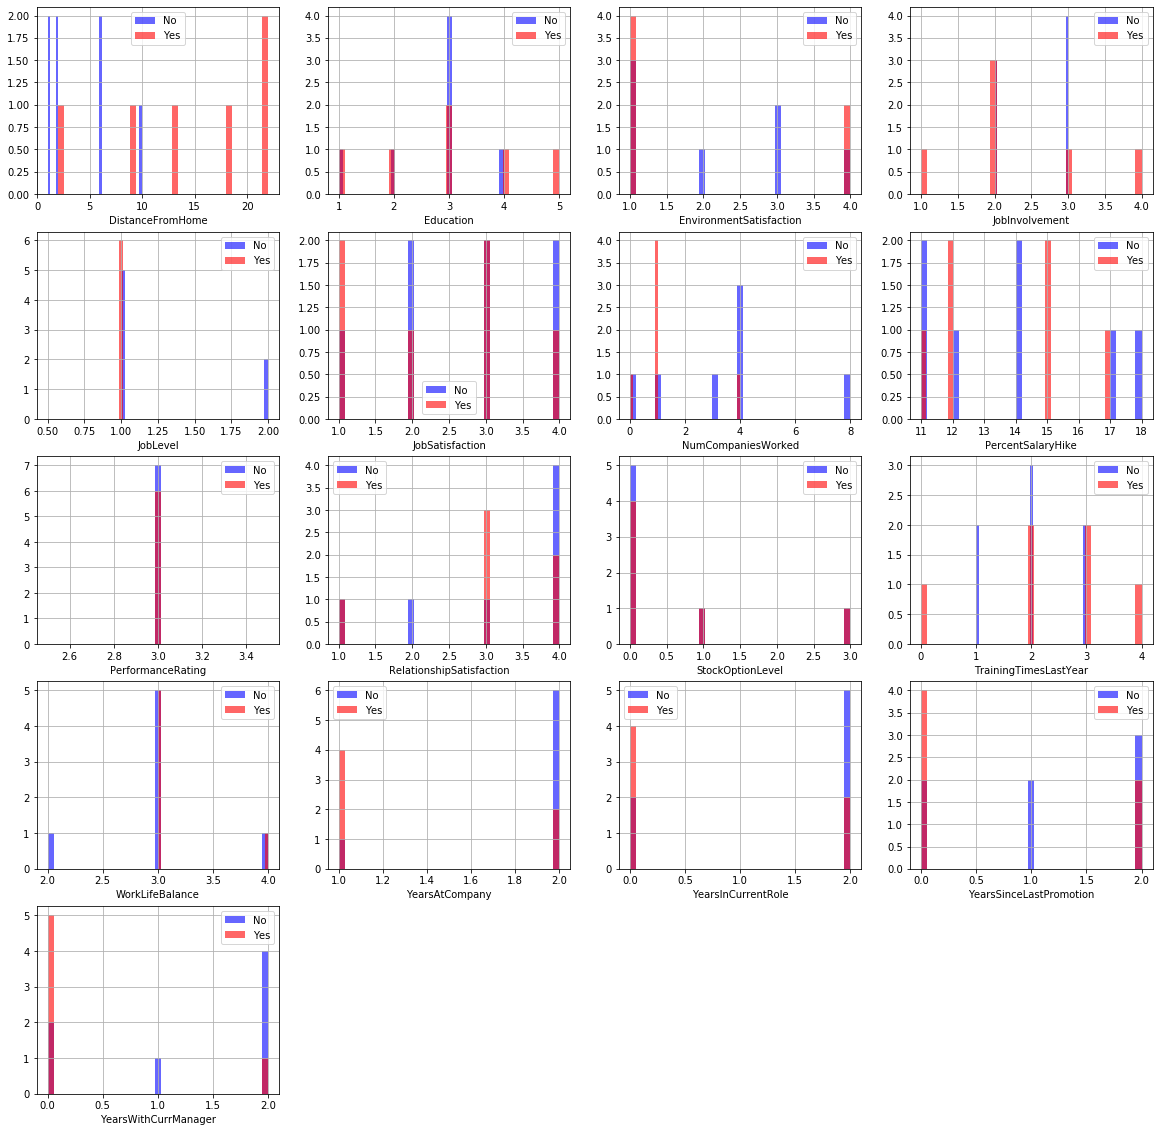

In [27]:
plt.figure(figsize=(20,20))

for i, column in enumerate(discrete_cols2, 1):
    plt.subplot(5,4,i)
    cyhr[cyhr["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "No", alpha = 0.6)
    cyhr[cyhr["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Yes", alpha = 0.6)
    plt.legend()
    plt.xlabel(column)

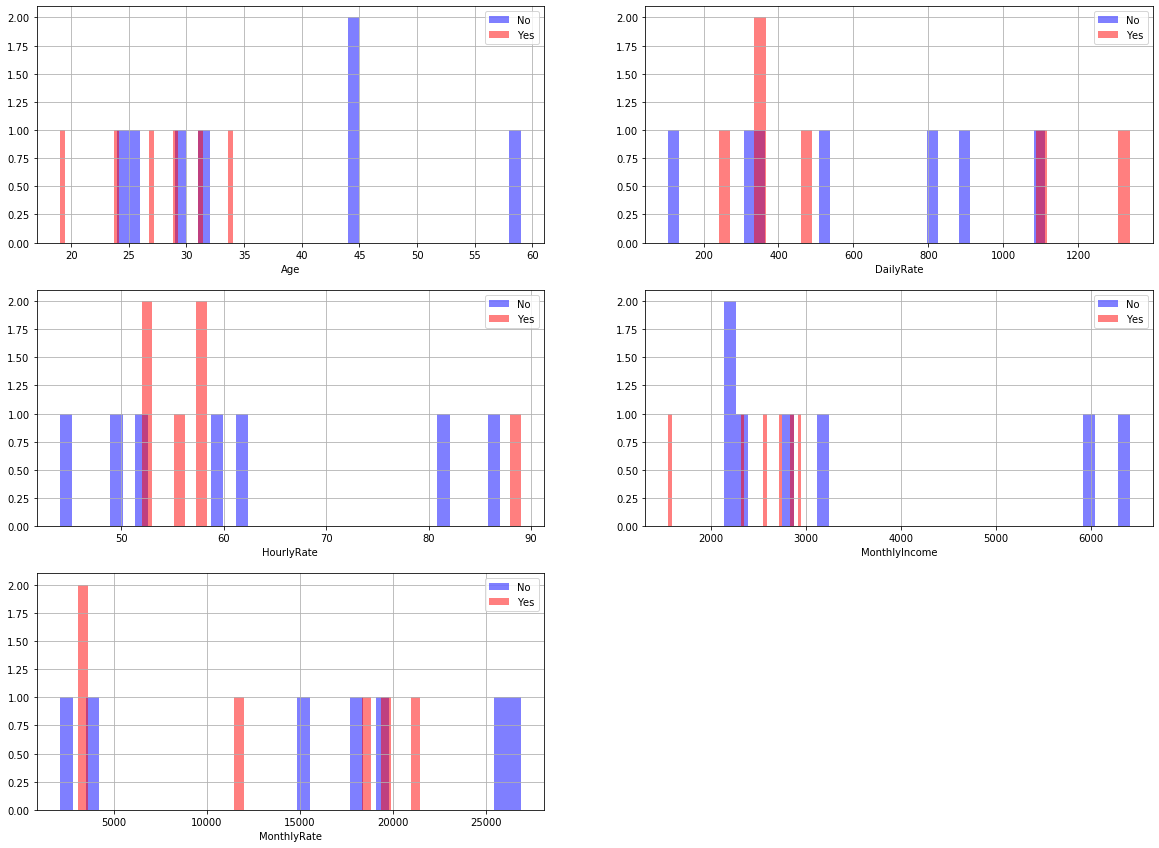

In [28]:
plt.figure(figsize=(20,20))

for i, column in enumerate(continuous2, 1):
    plt.subplot(4,2,i)
    cyhr[cyhr["Attrition"] == 0][column].hist(bins = 35, color = "blue", label = "No", alpha = 0.5)
    cyhr[cyhr["Attrition"] == 1][column].hist(bins = 35, color = "red", label = "Yes", alpha = 0.5)
    plt.legend()
    plt.xlabel(column)

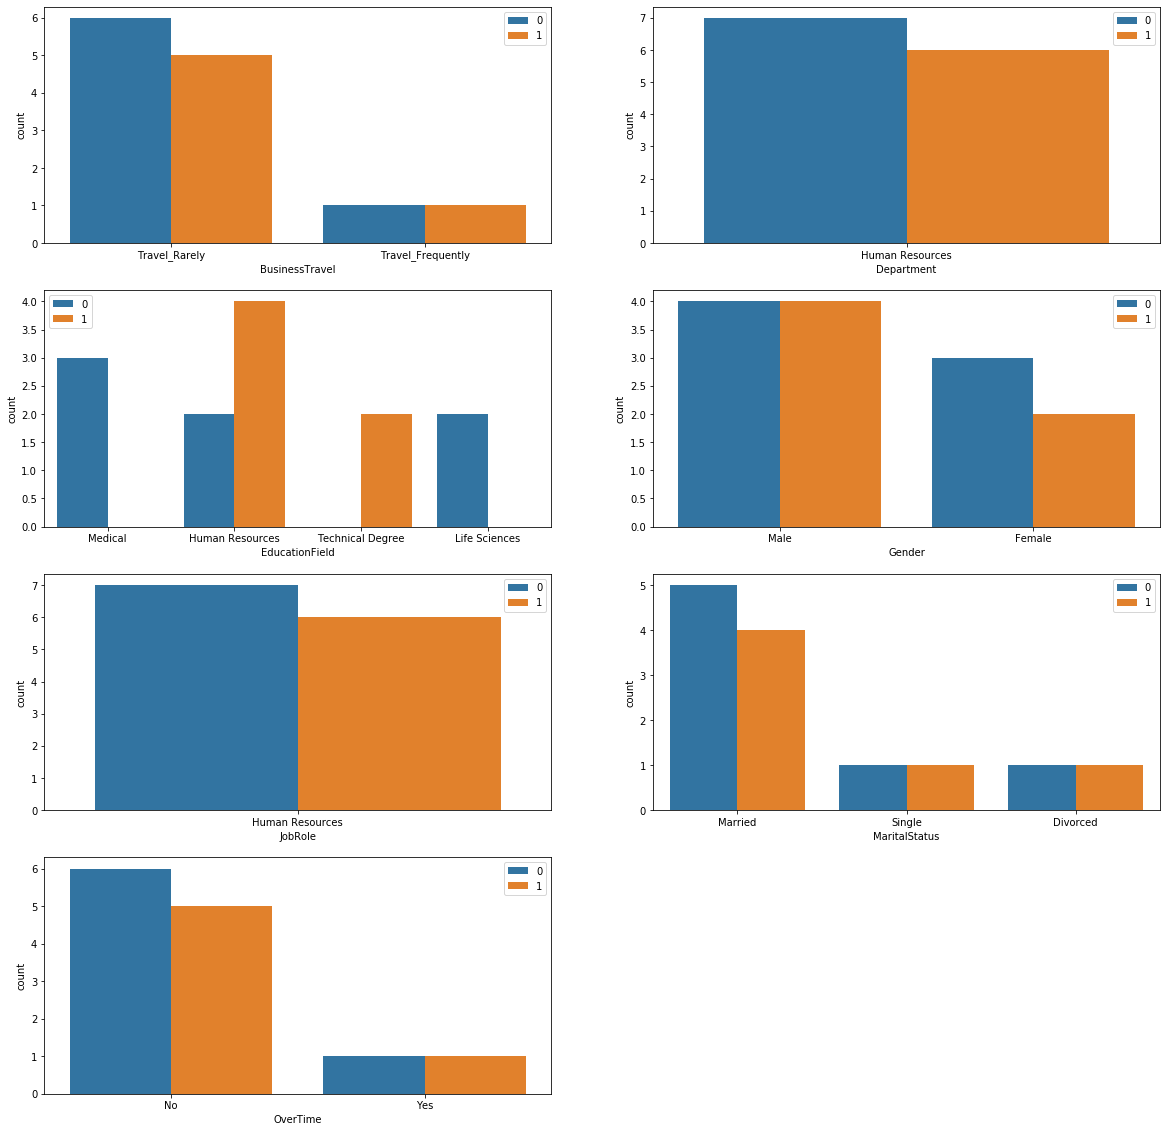

In [29]:
plt.figure(figsize=(20,20))

for i, column in enumerate(cat_cols2, 1):
    plt.subplot(4,2,i)
    sns.countplot(x=column, hue = "Attrition", data=cyhr)
    plt.legend()
    plt.xlabel(column)

In [36]:
cyhr['Attrition'].value_counts()

0    7
1    6
Name: Attrition, dtype: int64